In [10]:
import pandas as pd
import numpy as np
import scanpy as sc

In [11]:
from collections import Counter
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import os

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['pdf.fonttype'] = 42

In [13]:
class uhaf_organ_trace:

    def __init__(self,uhaf_file_path):
        self.uhaf = pd.read_csv(uhaf_file_path,index_col=0)
        self.uhaf['child'] = self.uhaf.index
        self.nodes = self.uhaf['child'].unique().tolist()

    def track_cell_from_uHAF(self, cell_type_target):
        trace = []
        while cell_type_target != 'Cell':
            tar_father = self.uhaf.loc[cell_type_target].father
            trace.append(cell_type_target)
            cell_type_target = tar_father
        trace.append('Cell')
        return trace[::-1]

    def get_MCT(self, cell_type_target,layer = 1):
        # print(f'layer is {layer}')
        trace = self.track_cell_from_uHAF(cell_type_target)
        assert len(trace) > layer
        return trace[layer]

def is_ancester(fine_ct,MCT,uhaf_trace):
    if MCT in uhaf_trace.track_cell_from_uHAF(fine_ct):
        return True
    else:
        return False



# Fig2.a visualization of the validation set of hECA10M

In [5]:
adata = sc.read_h5ad(
'/nfs/public/cell_gpt_data/Intergation_Data/Results/test_all.h5ad'
)

In [15]:
from matplotlib import rcParams
rcParams['figure.figsize']=(10,8)
rcParams['pdf.fonttype'] = 42
rcParams.update({'font.size': 14})
rcParams['figure.dpi']=600

In [ ]:
adata.uns['cell_type_colors'] = [
    "#FFB6C1", "#FFC0CB", "#DC143C", "#FFF0F5", "#DB7093", 
    "#FF69B4", "#FF1493", "#C71585", "#DA70D6", "#D8BFD8", 
    "#DDA0DD", "#EE82EE", "#FF00FF", "#FF00FF", "#8B008B", 
    "#800080", "#BA55D3", "#9400D3", "#9932CC", "#4B0082", 
    "#8A2BE2", "#9370DB", "#7B68EE", "#6A5ACD", "#483D8B", 
    "#E6E6FA", "#F8F8FF", "#0000FF", "#0000CD", "#191970", 
    "#00008B", "#000080", "#4169E1", "#6495ED", "#B0C4DE", 
    "#778899", "#708090", "#1E90FF", "#F0F8FF", "#4682B4", 
    "#87CEFA", "#87CEEB", "#00BFFF", "#ADD8E6", "#B0E0E6", 
    "#5F9EA0", "#F0FFFF", "#E1FFFF", "#AFEEEE", "#00FFFF", 
    "#00FFFF", "#00CED1", "#2F4F4F", "#008B8B", "#008080", 
    "#48D1CC", "#20B2AA", "#40E0D0", "#7FFFD4", "#66CDAA", 
    "#00FA9A", "#F5FFFA", "#00FF7F", "#3CB371", "#2E8B57", 
    "#F0FFF0", "#90EE90", "#98FB98", "#8FBC8F", "#32CD32", 
    "#00FF00", "#228B22", "#008000", "#006400", "#7FFF00", 
    "#7CFC00", "#ADFF2F", "#556B2F", "#6B8E23", "#FAFAD2", 
    "#FFFFF0", "#FFFFE0", "#FFFF00", "#808000", "#BDB76B", 
    "#FFFACD", "#EEE8AA", "#F0E68C", "#FFD700", "#FFF8DC", 
    "#DAA520", "#FFFAF0", "#FDF5E6", "#F5DEB3", "#FFE4B5", 
    "#FFA500", "#FFEFD5", "#FFEBCD", "#FFDEAD", "#FAEBD7", 
    "#D2B48C", "#DEB887", "#FFE4C4", "#FF8C00", "#FAF0E6", 
    "#CD853F", "#FFDAB9", "#F4A460", "#D2691E", "#8B4513", 
    "#FFF5EE", "#A0522D", "#FFA07A", "#FF7F50", "#FF4500", 
    "#E9967A", "#FF6347", "#FFE4E1", "#FA8072", "#FFFAFA", 
    "#F08080", "#BC8F8F", "#CD5C5C", "#FF0000", "#A52A2A", 
    "#B22222", "#8B0000", "#800000", "#FFFFFF", "#F5F5F5", 
    "#DCDCDC", "#D3D3D3", "#C0C0C0", "#A9A9A9", "#808080", 
    "#696969", "#778899", "#708090", "#2F4F4F", "#000000"
]
sc.pl.umap(adata, color=['cell_type'],size=2)

In [ ]:
sc.pl.umap(adata, color=['cell_type'],size=1,legend_loc="None", save="Fig1_cell_type_noLegend.png", frameon=False)

In [ ]:
plt.scatter([], [])

colors = adata.uns['cell_type_colors']
labels = adata.obs.cell_type.cat.categories

# 根据你的颜色和标签创建图例
for color, label in zip(colors, labels):
    plt.scatter([], [], c=color, label=label)

plt.legend()
plt.savefig("figures/Fig2a_Legend_only.pdf")  # 导出为PDF
plt.show()

In [ ]:
sc.pl.umap(adata, color=['region'],size=1,legend_loc="None", save="FigS2_region_noLegend.png", frameon=False)

In [ ]:
plt.scatter([], [])

colors = adata.uns['region_colors']
labels = adata.obs.region.cat.categories

# 根据你的颜色和标签创建图例
for color, label in zip(colors, labels):
    plt.scatter([], [], c=color, label=label)

plt.legend()
plt.savefig("figures/FigS2_Legend_only.pdf")  # 导出为PDF
plt.show()

# Fig2.b Metrics of different methods on the data integration experiments

In [15]:
colors = [
    '#b0c4de', #FastMNN
    '#afeeee', #harmony
    '#ffe4e1', #BBKNN
    '#f0e68c', #Seurat
    '#dda0dd', #scANVI  
    '#faebd7', #scVI
    '#98fb98', #scGPT_zeroshot
    '#12a93d', #scGPT_finetune
    '#b0903f', #Geneformer
    '#c88a6f',#scFoundation_zeroshot
    '#e94346'  #scMulan_zeroshot
]

### Lung

#### AvgBio

/tmp/ipykernel_187512/3725262077.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=methods, y=scores, order=methods, palette=colors)
/tmp/ipykernel_187512/3725262077.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


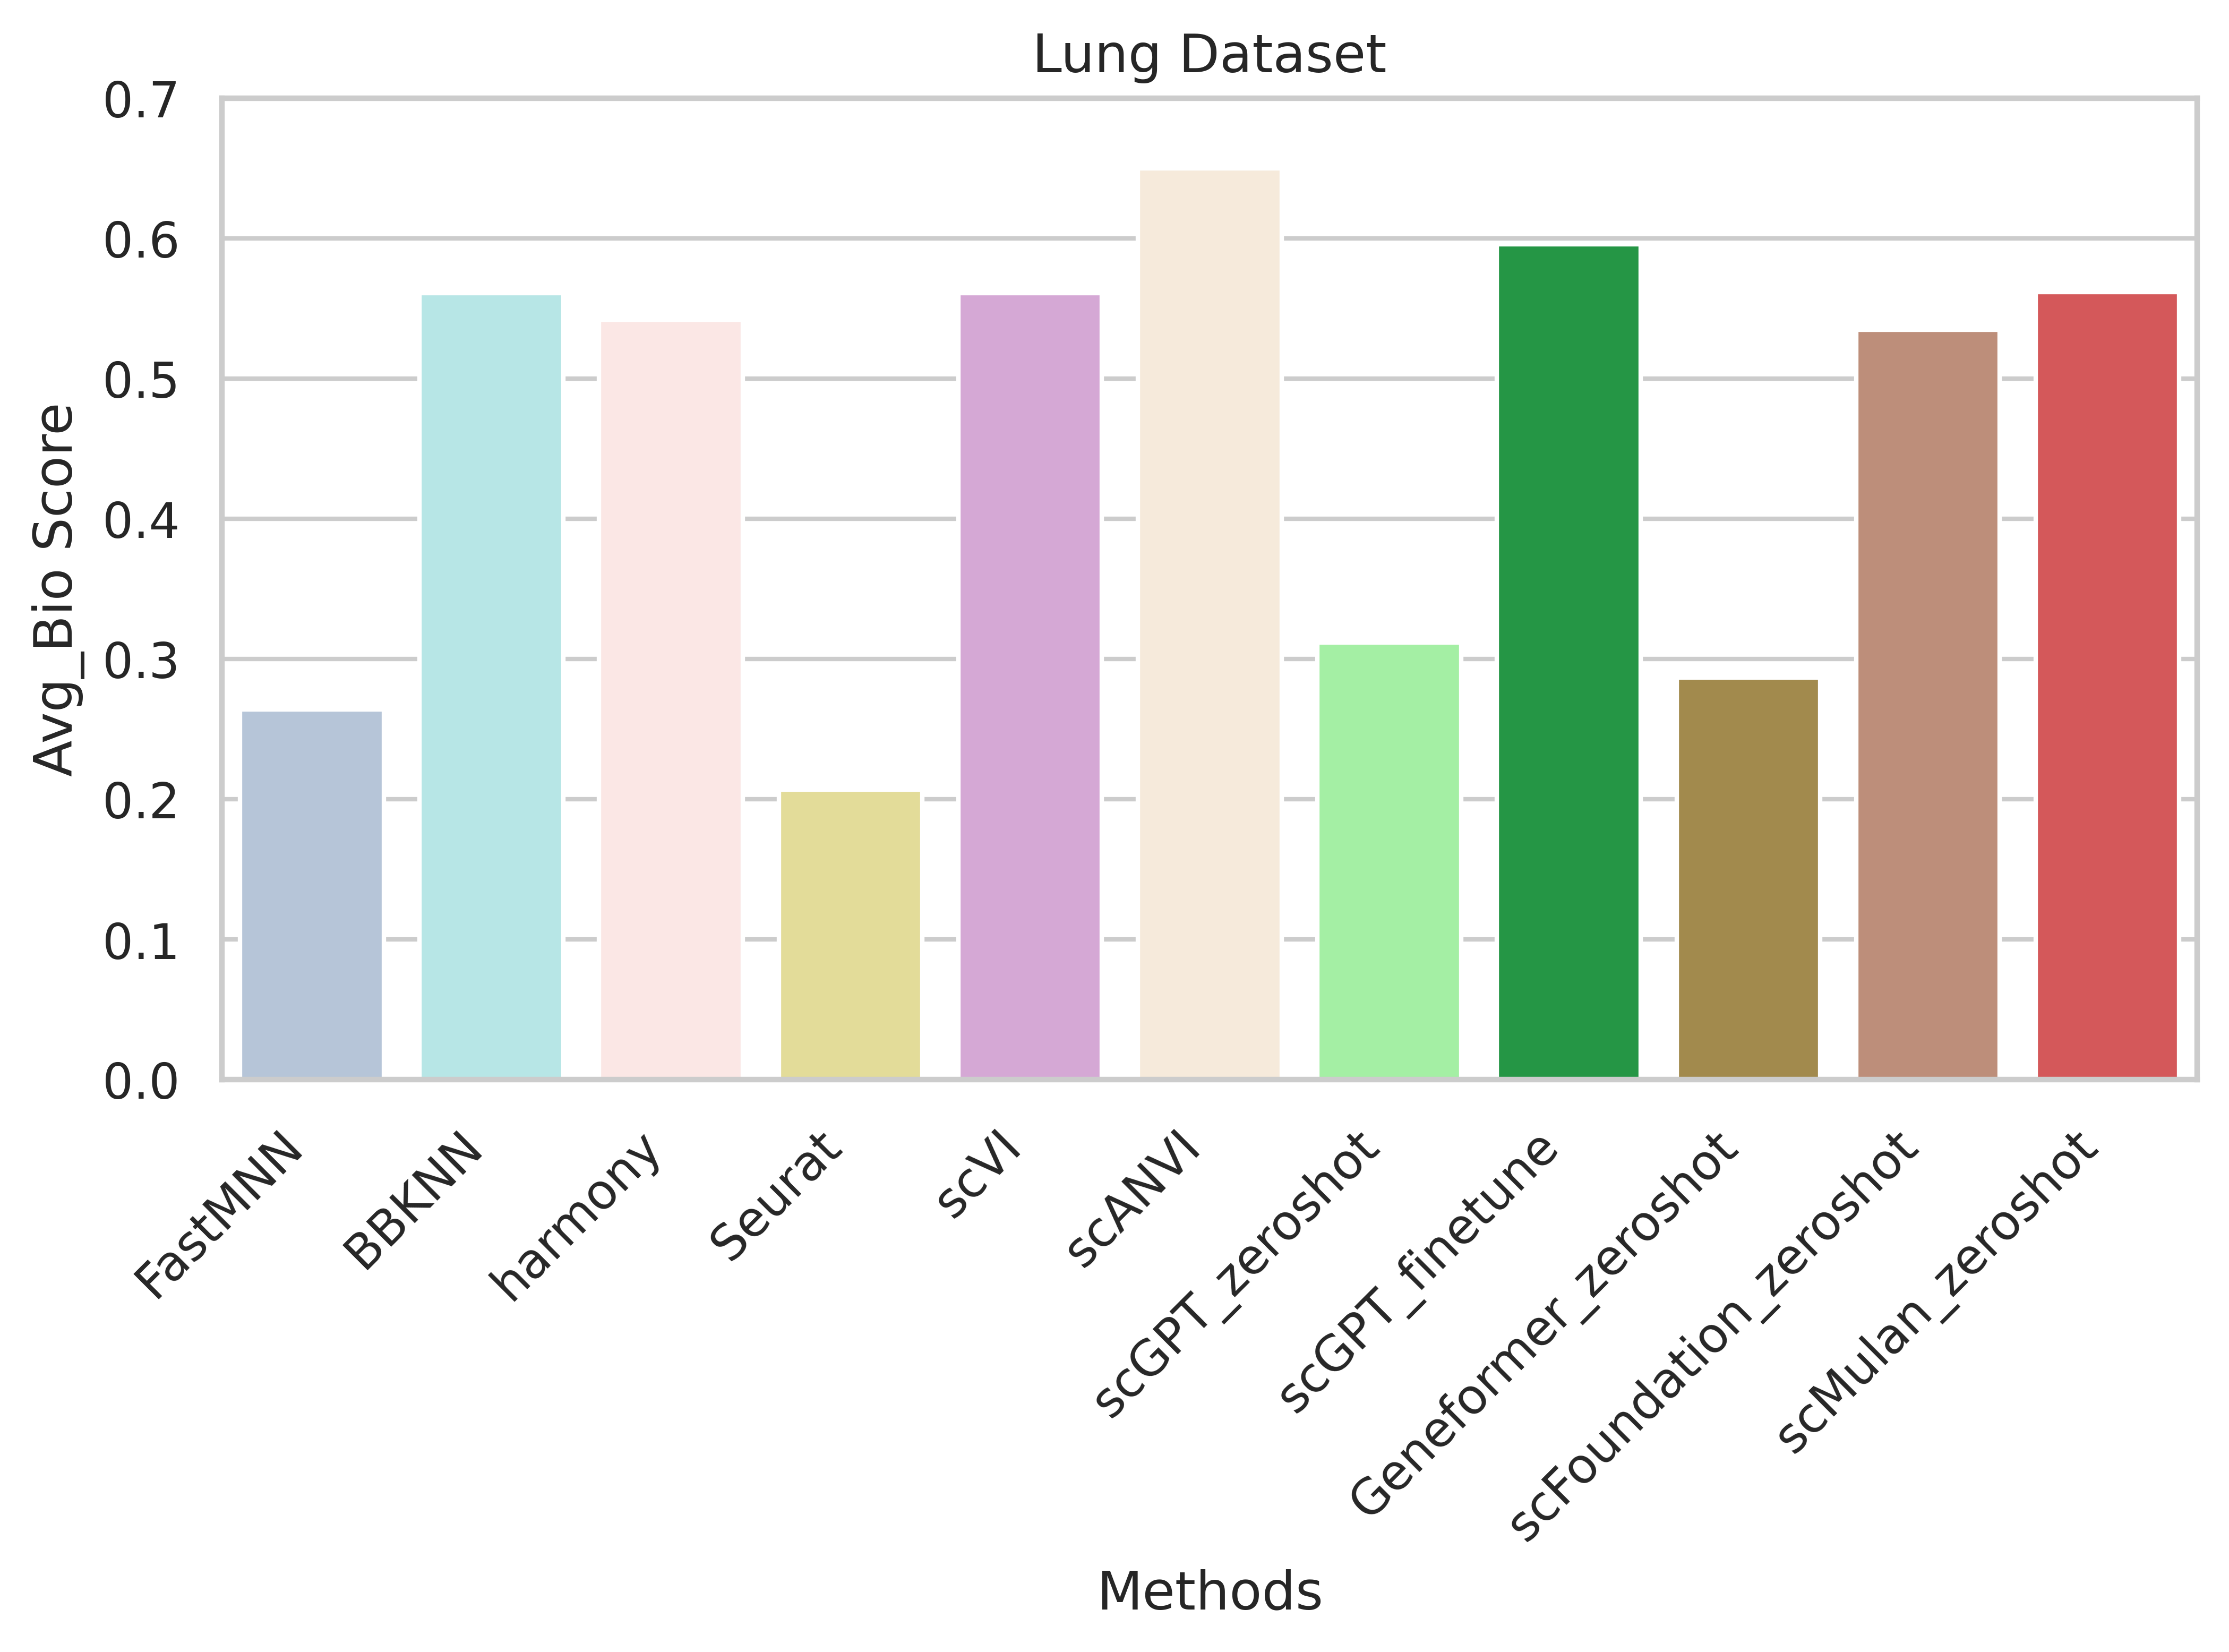

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
dataset = 'Lung'
methods_list = ['FastMNN', 'harmony', 'BBKNN', 'Seurat', 'scANVI', 'scVI', 'scGPT_zeroshot', 'scGPT_finetune', 'Geneformer_zeroshot', 'scMulan_zeroshot']
score_dict = {
    'FastMNN': 0.264,
    'BBKNN': 0.561,
    'harmony': 0.542,
    'Seurat': 0.207,
    'scVI': 0.561,
    'scANVI': 0.650,
    'scGPT_zeroshot': 0.312,
    'scGPT_finetune': 0.596,
    'Geneformer_zeroshot':0.287,
    'scFoundation_zeroshot':0.535,
    'scMulan_zeroshot': 0.562
}

# Preparing data
methods = list(score_dict.keys())
scores = list(score_dict.values())

# Creating the plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
barplot = sns.barplot(x=methods, y=scores, order=methods, palette=colors)

# Adjusting aesthetics
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
barplot.set_title('Lung Dataset')
barplot.set_xlabel('Methods')
barplot.set_ylabel('Avg_Bio Score')

plt.ylim(0, 0.7)
plt.savefig("figures/Integration_metric_Lung_AvgBio.pdf", bbox_inches='tight')
# Display the plot
plt.show()


### COVID-19

#### AvgBio

/tmp/ipykernel_187512/2227030071.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=methods, y=scores, order=methods, palette=colors)
/tmp/ipykernel_187512/2227030071.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


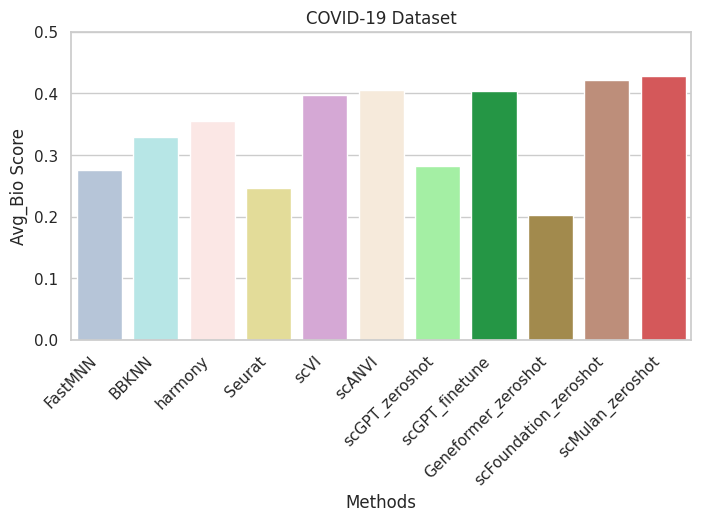

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
dataset = 'covid-19'
score_dict = {
    'FastMNN': 0.276,
    'BBKNN': 0.33,
    'harmony': 0.355,
    'Seurat': 0.246,
    'scVI': 0.397,
    'scANVI': 0.405,
    'scGPT_zeroshot': 0.283,
    'scGPT_finetune': 0.404,
    'Geneformer_zeroshot':0.202,
    'scFoundation_zeroshot':0.422,
    'scMulan_zeroshot': 0.429,
}

# Preparing data
methods = list(score_dict.keys())
scores = list(score_dict.values())


# Creating the plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
barplot = sns.barplot(x=methods, y=scores, order=methods, palette=colors)

# Adjusting aesthetics
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
barplot.set_title('COVID-19 Dataset')
barplot.set_xlabel('Methods')
barplot.set_ylabel('Avg_Bio Score')

plt.ylim(0, 0.5)
plt.savefig("figures/Integration_metric_COVID_AvgBio.pdf", bbox_inches='tight')
# Display the plot
plt.show()


# Fig2.c Visualization of embeddings from different methodsm

In [18]:
rcParams['figure.figsize']=(5,4)
plt.rcParams.update({'font.size': 14})
rcParams['figure.dpi']=600

## raw COVID

In [19]:
adata_raw = sc.read_h5ad("/nfs/public/cell_gpt_data/Intergation_COVID/Results/merged_result.h5ad")

In [ ]:
sc.pl.umap(adata_raw, color="celltype",legend_loc=None, title="Raw", frameon=False, save="Fig2c_raw.png")

In [ ]:
plt.scatter([], [])

colors = adata_raw.uns['celltype_colors']
labels = adata_raw.obs.celltype.cat.categories

# 根据你的颜色和标签创建图例
for color, label in zip(colors, labels):
    plt.scatter([], [], c=color, label=label)

plt.legend()
plt.savefig("figures/Fig2c_Legend.pdf")  # 导出为PDF
plt.show()

## Geneformer zeroshot

In [30]:
adata_geneformer = sc.read_h5ad("/nfs/public/cell_gpt_data/Intergation_COVID/Results/all_methods_covid.h5ad")
adata_geneformer.uns['celltype_colors'] = colors

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
obsm_pca = pca.fit_transform(adata_geneformer.obsm['geneformer'])
adata_geneformer.obsm['X_pca'] = obsm_pca

sc.pp.neighbors(adata_geneformer,use_rep="X_pca",n_pcs=50)
sc.tl.umap(adata_geneformer)

In [ ]:
sc.pl.umap(adata_geneformer, color="celltype",legend_loc=None, title="Geneformer_without_Finetune", frameon=False, save="Fig2c_geneformer.png")

## scGPT zeroshot

In [33]:
adata_scGPT = sc.read_h5ad("/nfs/public/cell_gpt_data/Intergation_COVID/Results/scGPT_without_finetune_result.h5ad")
adata_scGPT.uns['celltype_colors'] = colors

In [34]:
pca = PCA(n_components=50)
obsm_pca = pca.fit_transform(adata_scGPT.obsm['X_scGPT'])
adata_scGPT.obsm['X_pca'] = obsm_pca

sc.pp.neighbors(adata_scGPT,use_rep="X_pca")
sc.tl.umap(adata_scGPT)

adata_scGPT.uns["celltype_colors"] = colors

In [ ]:
sc.pl.umap(adata_scGPT, color="celltype",legend_loc=None, title="scGPT_without_Finetune", frameon=False, save="Fig2c_scGPT_without_FT.png")

## scGPT with fine-tune

In [36]:
adata_scGPT = sc.read_h5ad("/nfs/public/cell_gpt_data/Intergation_COVID/Results/scGPT_result.h5ad")
adata_scGPT.uns['celltype_colors'] = colors

In [37]:
pca = PCA(n_components=50)
obsm_pca = pca.fit_transform(adata_scGPT.obsm['X_scGPT'])
adata_scGPT.obsm['X_pca'] = obsm_pca

sc.pp.neighbors(adata_scGPT,use_rep="X_pca")
sc.tl.umap(adata_scGPT)

adata_scGPT.uns["celltype_colors"] = colors

In [ ]:
sc.pl.umap(adata_scGPT, color="celltype",legend_loc=None, title="scGPT_with_Finetune", frameon=False, save="Fig2c_scGPT_with_FT.png")

## scMulan

In [39]:
adata_scMulan = sc.read_h5ad("/nfs/public/cell_gpt_data/Intergation_COVID/Results/scMulan_only.h5ad")
adata_scMulan.uns["celltype_colors"] = colors

In [ ]:
sc.pl.umap(adata_scMulan, color="celltype",legend_loc=None, title="scMulan", frameon=False, save="Fig2c_scMulan.png")

## scFoundation zeroshot

In [17]:
adata_sF = sc.read_h5ad("/nfs/public/cell_gpt_data/Intergation_COVID/Results/all_methods_covid_add_scF.h5ad")

In [21]:
sc.pp.neighbors(adata_sF,use_rep="scF")
sc.tl.umap(adata_sF)

/data1/chenyx/anaconda3/envs/scMulan/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
sc.pl.umap(adata_sF, color="celltype",legend_loc=None, title="scFoundation zeroshot", frameon=False, save="Fig2c_scFoundation.png")

# Fig2.d The barplot of the integration time in the COVID-19 dataset

In [1]:
colors = [
    '#b0c4de', #FastMNN
    '#afeeee', #harmony
    '#ffe4e1', #BBKNN
    '#f0e68c', #Seurat
    '#dda0dd', #scANVI  
    '#faebd7', #scVI
    '#98fb98', #scGPT_zeroshot
    '#12a93d', #scGPT_finetune
    '#b0903f', #Geneformer
    '#c88a6f',#scFoundation_zeroshot
    '#e94346'  #scMulan_zeroshot
]

/tmp/ipykernel_187512/1687189454.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=methods, y=times, palette=colors)
/tmp/ipykernel_187512/1687189454.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


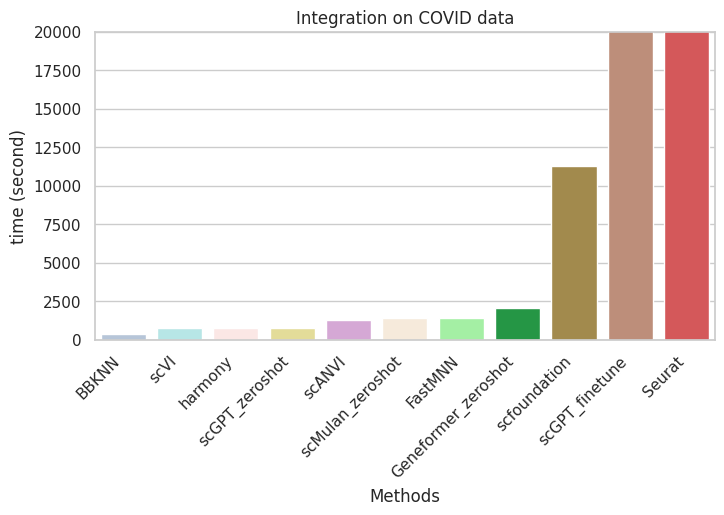

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

time_dict ={
    'BBKNN': 346,
    'scVI': 735,
    'harmony': 738,
    'scGPT_zeroshot': 770,
    'scANVI': 1308,
    'scMulan_zeroshot': 1380,
    'FastMNN': 1429,
    'Geneformer_zeroshot': 2046,
    'scfoundation': 11288,
    'scGPT_finetune': 37370,
    'Seurat': 36000,
}


# Preparing data
methods = list(time_dict.keys())
times = list(time_dict.values())

# Creating the plot
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
barplot = sns.barplot(x=methods, y=times, palette=colors)

# Adjusting aesthetics
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
barplot.set_title('Integration on COVID data')
barplot.set_xlabel('Methods')
barplot.set_ylabel('time (second)')

plt.ylim(0, 20000)
plt.savefig("figures/Fig2d_time_COVID.pdf", bbox_inches='tight')
# Display the plot
plt.show()